`Super-Vised Machine Learning`

`Regression` - Linear Regression

`Classification` - Logistic Regreesion

`Model Evaluation Metrices` - r2_score, MSE, L2-norm loss, confusion matrix, pricision, recall, f1-score



    Business Problem

    Data Collection Plan

    Data Preprocessing and Cleaning

    Analysis & Visulations

    Features Selection

    Modeling & Evaluation

    Deployment 

    Feedback -> stage 1


### Recommandation

    used to suggest items on the basis similarity 

__K-NN__ K-Nearest Neighbours Algorithm

    working 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

In [31]:
features, target = make_blobs(n_samples=100, n_features=2, cluster_std=2.2, centers=2)

In [32]:
features[:5]

array([[-10.93265287,  10.45067359],
       [ -9.57371766,   3.49482707],
       [-10.19576678,  -1.32490096],
       [ -6.46433429,  -1.04156925],
       [ -7.43155727,   0.18501015]])

In [33]:
target[:5]

array([0, 0, 1, 0, 1])

In [34]:
features.shape

(100, 2)

In [38]:
x = features[:, 0]

In [39]:
y = features[:, 1]

In [40]:
x.shape

(100,)

In [41]:
y.shape

(100,)

In [42]:
target.shape

(100,)

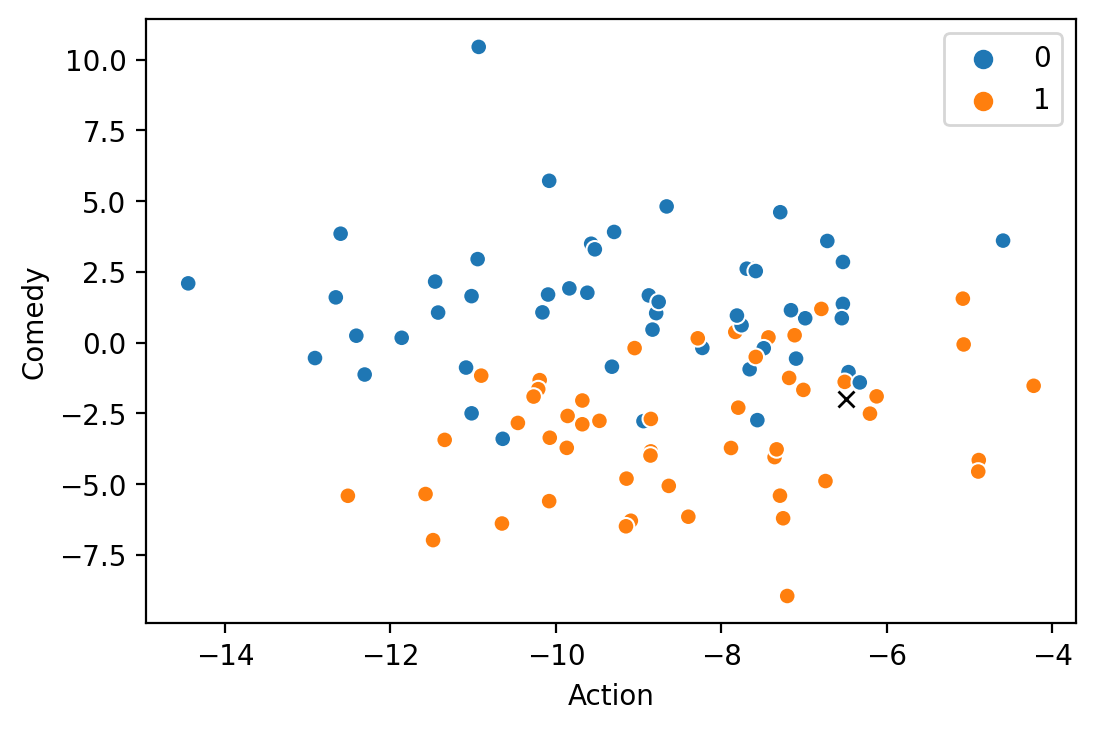

In [94]:
new_movie = np.array([-6.5, -2])
plt.figure(dpi=200)
sns.scatterplot(x, y, hue=target)# c=target)
plt.xlabel("Action")
plt.ylabel('Comedy')
plt.plot([new_movie[0]], [new_movie[1]], 'kx', ms=6)
#plt.xticks([])
#plt.yticks([])
plt.show()

# 0 is dislike
# 1 is like

$$ d_i \quad = \quad \sqrt { {(x-x_i)}^2 + {(y-y_i)}^2 }  $$

observation point(x, y)

In [75]:
p1 = np.array([2, 5])
p2 = np.array([3, 2])

In [76]:
p1

array([2, 5])

In [77]:
p2

array([3, 2])

In [80]:
((p2 - p1 )**2 ).sum()# (3-2)**2 + (5-2)**2
#             #  1 + 9 -> 10

10

In [81]:
p1 = np.array([ 1, 2, 3])
p2 = np.array([4, 5, 6])

In [85]:
np.sqrt(((p2-p1)**2).sum())

5.196152422706632

In [86]:
np.linalg.norm(p2-p1)

5.196152422706632

In [89]:
def distance(p1, p2):
    d = np.sqrt(((p2 - p1)**2).sum())
    return d

In [90]:
distance(p1, p2)

5.196152422706632

In [95]:
new_movie, features[:1][0]

(array([-6.5, -2. ]), array([-10.93265287,  10.45067359]))

In [98]:
distance(new_movie, features[90:91][0])

4.778870548750906

In [102]:
new_movie

array([-6.5, -2. ])

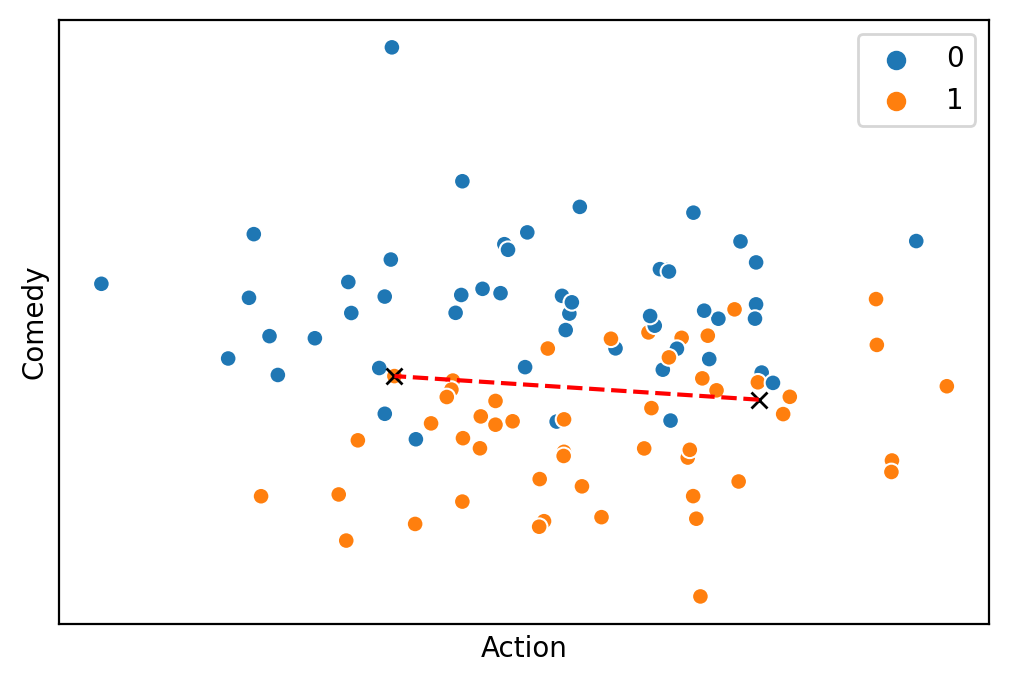

In [107]:
new_movie = np.array([-6.5, -2])
p = features[60:61][0]
plt.figure(dpi=200)
sns.scatterplot(x, y, hue=target)# c=target)
plt.xlabel("Action")
plt.ylabel('Comedy')
plt.plot([new_movie[0]], [new_movie[1]], 'kx', ms=6)
plt.plot([p[0]], [p[1]], 'kx', ms=6)
plt.plot([new_movie[0], p[0]], [new_movie[1],p[1]], '--r')
plt.xticks([])
plt.yticks([])
plt.show()

# 0 is dislike
# 1 is like

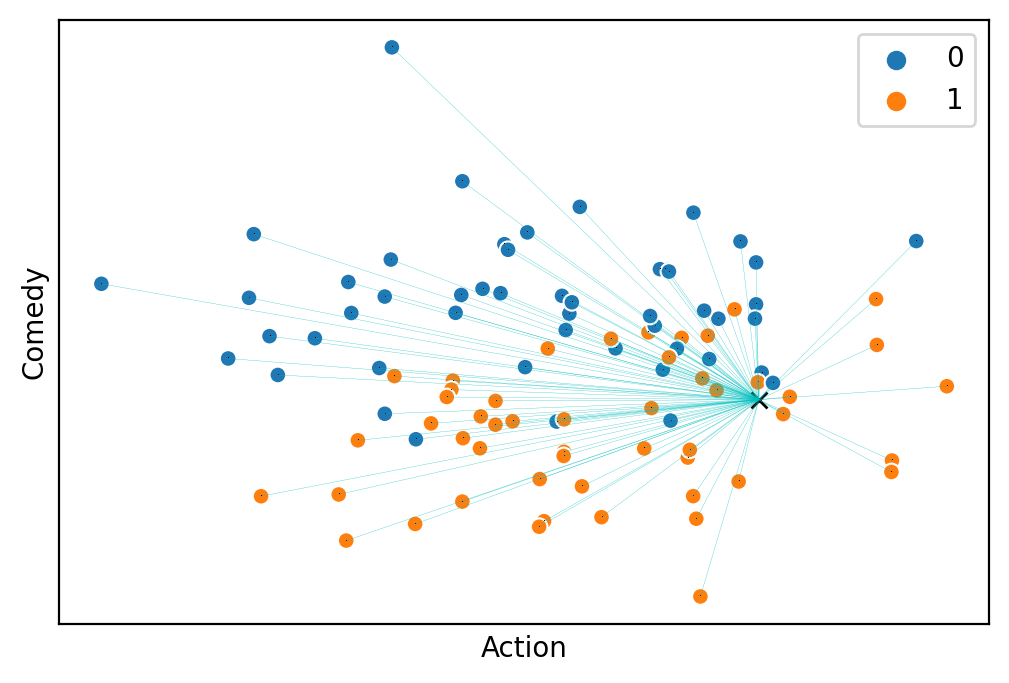

In [117]:
new_movie = np.array([-6.5, -2])

plt.figure(dpi=200)
sns.scatterplot(x, y, hue=target)# c=target)
plt.xlabel("Action")
plt.ylabel('Comedy')
plt.plot([new_movie[0]], [new_movie[1]], 'kx', ms=6)

for i in range(100):
    p = features[i:i+1][0]
    plt.plot([p[0]], [p[1]], 'k,', ms=6)
    plt.plot([new_movie[0], p[0]], [new_movie[1],p[1]], '-c', lw=0.1)
plt.xticks([])
plt.yticks([])
plt.show()

# 0 is dislike
# 1 is like

In [ ]:
[[1, 2], [2, 3]]

In [ ]:
# def k_neighbours(X_train, y_train, X_test, k=5)

In [119]:
a = np.array([ [5,4], [4, 5], [1, 2]])

In [120]:
for row in a:
    print(row)

[5 4]
[4 5]
[1 2]


In [ ]:
def distance(p1, p2):
    d = np.sqrt(((p2 - p1)**2).sum())
    return d

In [ ]:
point = new_movie
[ (distance(point, tpoint), cat) for tpoint, cat in zip(features, target)]

In [143]:
def k_neighbours(features, cls, test, k=5):
    pred = [ ]
    for point in test:
        dis = [ (distance(point, tpoint), cat) for tpoint, cat in zip(features, cls) ]
        dis.sort()
        dis = dis[:k]
        cls_pred = {}
        for d, c in dis:
            if c in cls_pred:
                cls_pred[c] += 1
            else:
                cls_pred[c] = 1
        p = sorted(cls_pred.items(), key=lambda item:item[1], reverse=True)[0][0]
        pred.append(p)
    return pred

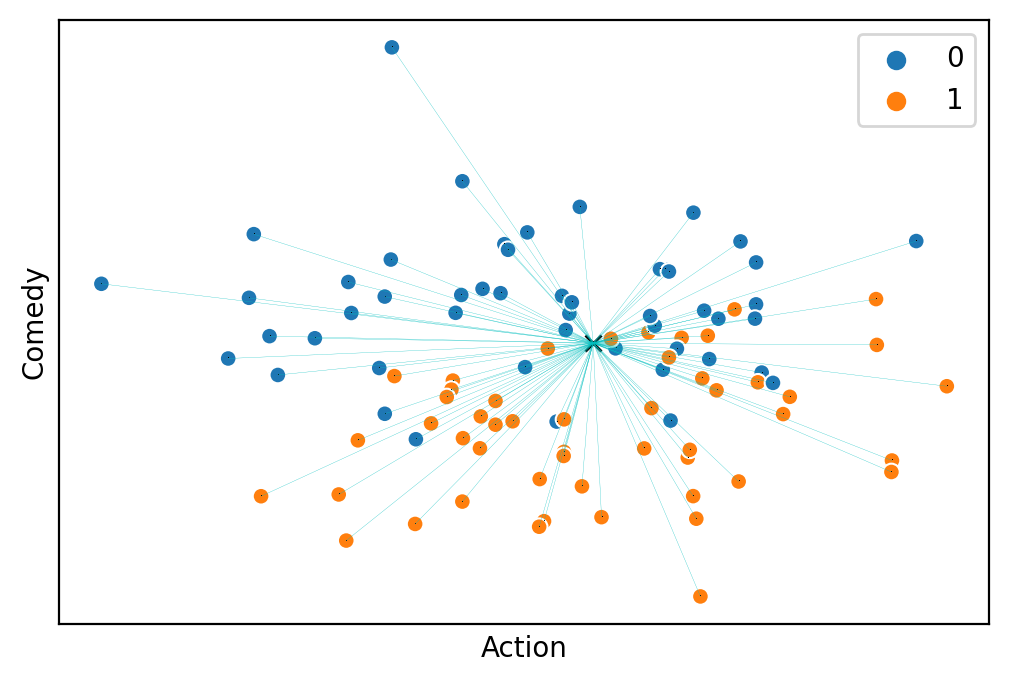

In [149]:
new_movie = np.array([-8.5, 0])
plt.figure(dpi=200)
sns.scatterplot(x, y, hue=target)# c=target)
plt.xlabel("Action")
plt.ylabel('Comedy')
plt.plot([new_movie[0]], [new_movie[1]], 'kx', ms=6)

for i in range(100):
    p = features[i:i+1][0]
    plt.plot([p[0]], [p[1]], 'k,', ms=6)
    plt.plot([new_movie[0], p[0]], [new_movie[1],p[1]], '-c', lw=0.1)
plt.xticks([])
plt.yticks([])
plt.show()

# 0 is dislike
# 1 is like

In [150]:
k_neighbours(features, target, [new_movie], k=11)

[0]

In [134]:
l = [ (1.2, 0), (2.4, 1), (1.0, 0), (0.9, 1), (2.5, 0), (3.5, 1), (1.5, 0)]
l.sort()

In [135]:
l

[(0.9, 1), (1.0, 0), (1.2, 0), (1.5, 0), (2.4, 1), (2.5, 0), (3.5, 1)]

In [136]:
dd = {
    
}
for d,c in l:
    if c in dd:
        dd[c] += 1
    else:
        dd[c] = 1

In [137]:
dd

{1: 3, 0: 4}

In [141]:
sorted(dd.items(), key=lambda x:x[1], reverse=True)[0][0]

0

[colab](https://colab.research.google.com/drive/1UVSLIM9_WPG2A0euhUxB0n6ESR6zP0W7?usp=sharing)

In [151]:
def distance(p1, p2):
    d = np.sqrt(((p2 - p1)**2).sum())
    return d

def k_neighbours(features, cls, test, k=5):
    pred = [ ]
    for point in test:
        dis = [ (distance(point, tpoint), cat) for tpoint, cat in zip(features, cls) ]
        dis.sort()
        dis = dis[:k]
        cls_pred = {}
        for d, c in dis:
            if c in cls_pred:
                cls_pred[c] += 1
            else:
                cls_pred[c] = 1
        p = sorted(cls_pred.items(), key=lambda item:item[1], reverse=True)[0][0]
        pred.append(p)
    return pred

In [153]:
features[:5]

array([[-10.93265287,  10.45067359],
       [ -9.57371766,   3.49482707],
       [-10.19576678,  -1.32490096],
       [ -6.46433429,  -1.04156925],
       [ -7.43155727,   0.18501015]])

In [154]:
target[:5]

array([0, 0, 1, 0, 1])

__step1__ load data

In [161]:
movies = pd.DataFrame(features, columns=['Action', 'Comedy'])
movies.head()

,Action,Comedy
0,-10.932653,10.450674
1,-9.573718,3.494827
2,-10.195767,-1.324901
3,-6.464334,-1.041569
4,-7.431557,0.185010


In [159]:
target = pd.Series(target).map({0:'dislike', 1:'like'})
target.head()

0    dislike
1    dislike
2       like
3    dislike
4       like
dtype: object

__step2__ split data into train test

In [162]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(movies, target, test_size=.3)

In [177]:
X_train.head()

,Action,Comedy
58,-7.332950,-3.770976
49,-6.987559,0.861215
68,-8.399871,-6.151090
67,-7.659176,-0.939880
27,-7.097995,-0.564374


In [178]:
y_train.head()

58       like
49    dislike
68       like
67    dislike
27    dislike
dtype: object

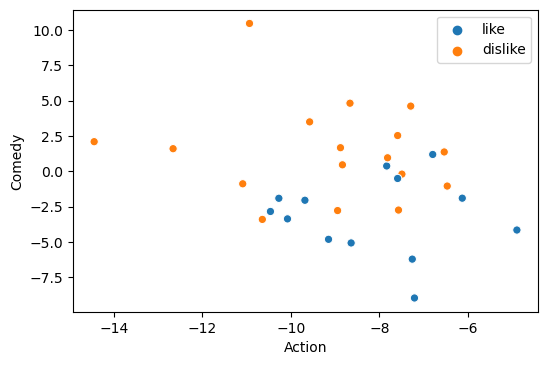

In [179]:
plt.figure(dpi=100)
sns.scatterplot(X_test.iloc[:, 0], X_test.iloc[:, 1], hue=y_test)
plt.show()

__step3__ model selection

    Custom K-Nearest Neighbour Model

In [17]:
class K_NearestNeighbour:
    def __init__(self, k):
        self.features = None
        self.cls = None
        self.k = k
    def distance(self, p1, p2):
        d = np.sqrt(((p2 - p1)**2).sum())
        return d
    def fit(self, X_train, y_train):
        self.features = X_train.to_numpy()
        self.cls = y_train.to_numpy()
    def predict(self, test):
        test = test.to_numpy()
        features = self.features
        cls = self.cls
        k = self.k
        pred = [ ]
        for point in test:
            dis = [ (self.distance(point, tpoint), cat) for tpoint, cat in zip(features, cls) ]
            dis.sort()
            dis = dis[:k]
            cls_pred = {}
            for d, c in dis:
                if c in cls_pred:
                    cls_pred[c] += 1
                else:
                    cls_pred[c] = 1
            p = sorted(cls_pred.items(), key=lambda item:item[1], reverse=True)[0][0]
            pred.append(p)
        return pred

In [18]:
model = K_NearestNeighbour(k=13)

__step4__ fitting or training

In [19]:
model.fit(X_train, y_train)

__step5__ Prediction and Evaluation

In [23]:
import numpy as np

In [24]:
y_pred = model.predict(X_test)

In [25]:
# dataframe --> numpy array
y_pred[:5]

['setosa', 'setosa', 'virginica', 'versicolor', 'versicolor']

In [26]:
y_test[:5].to_numpy()

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  97.77777777777777


In [30]:
print("Confusion Matrix: \n\n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 

 [[14  0  0]
 [ 0 15  1]
 [ 0  0 15]]


In [31]:
print("Classification Matrix: \n\n", classification_report(y_test, y_pred))

Classification Matrix: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Hyper Parameter Tuning

In [32]:
erros = []
ks = []
for i in range(5, 51, 2):
    model = K_NearestNeighbour(k=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    #print(f"\nk = {i:>2} --> accuracy = {acc:.2f}\n")
    #print("__"*30)
    ks.append(i)
    erros.append(1-acc)

#### Elbow Method

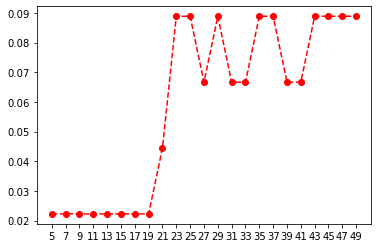

In [33]:
plt.plot(ks, erros, 'r--o', label='Elbow Method')
plt.xticks(ks)
plt.show()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
iris = sns.load_dataset('iris')

In [36]:
features = iris.drop('species', axis=1)

In [37]:
target = iris['species']

In [38]:
target[:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [39]:
features[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [127]:
model = K_NearestNeighbour(k=13)

In [128]:
model.fit(X_train, y_train)

In [129]:
y_pred = model.predict(X_test)

In [130]:
y_pred[:5]

['virginica', 'virginica', 'versicolor', 'virginica', 'setosa']

In [131]:
y_test[:5].to_numpy()

array(['virginica', 'virginica', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [132]:
print("Accuracy: ", round(accuracy_score(y_test, y_pred)*100, 2))

Accuracy:  97.37


In [133]:
print("Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:

 [[13  0  0]
 [ 0 11  0]
 [ 0  1 13]]


In [134]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Hyper parameter tunning aka Elbow Method

In [135]:
def error_rate(X_train, y_train, X_test, y_test, m=100, j=3):
    k,e = [], []
    for i in range(5, m, j):
        if i % 2 == 0:
            i += 1
        model = K_NearestNeighbour(k=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        err = 1 - accuracy_score(y_test, y_pred)
        k.append(i)
        e.append(err)
    return k,e

In [136]:
k,e = error_rate(X_train, y_train, X_test, y_test)

In [161]:
import warnings
warnings.filterwarnings(action='ignore')

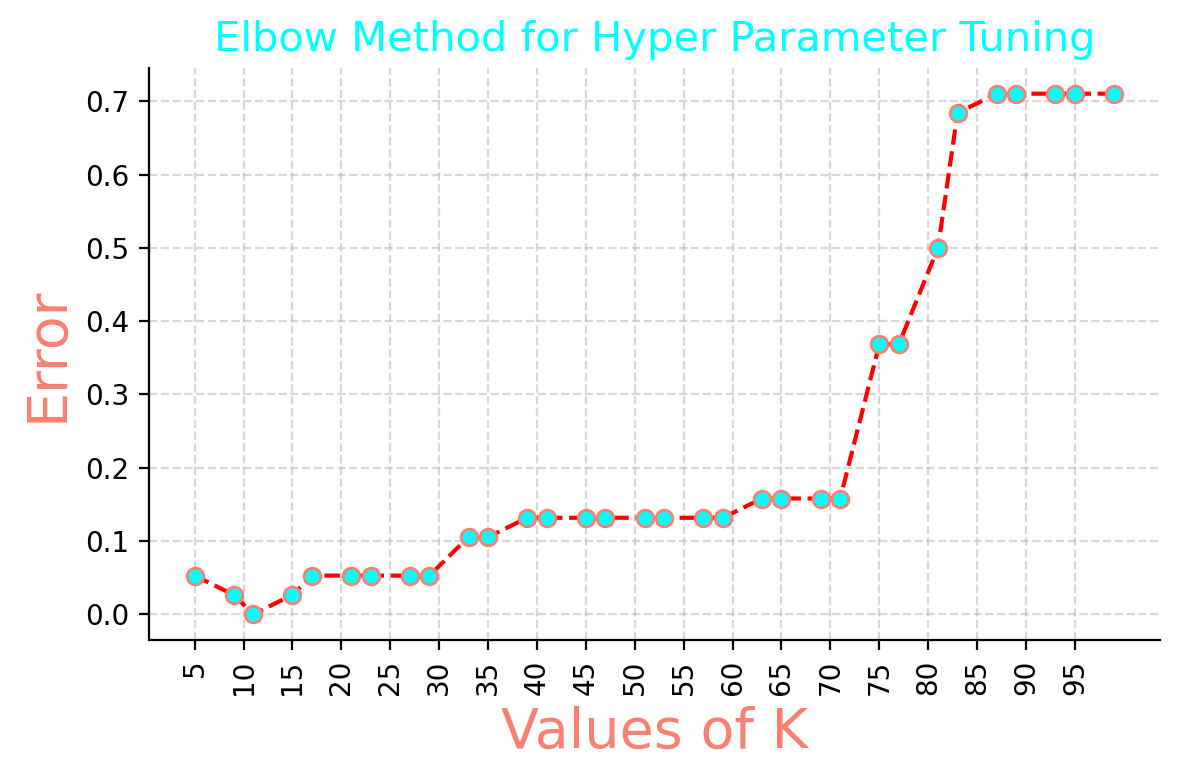

In [173]:
plt.figure(dpi=200)
plt.title("Elbow Method for Hyper Parameter Tuning", color='cyan', fontsize=15)
for sp in ['top', 'right']:
    plt.axes().spines[sp].set_visible(False)
plt.xticks(range(0,100, 5), rotation=90)
plt.grid(ls='--', alpha=0.5)
plt.plot(k, e, 'r--o', markerfacecolor='cyan', markeredgecolor='salmon')
plt.xlabel("Values of K", fontsize=20, color='salmon')
plt.ylabel("Error", fontsize=20, color='salmon')
plt.tight_layout()
plt.savefig('elbow_method.png', dpi=300)
plt.show()

In [158]:
a.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x200c8a29208>),
             ('right', <matplotlib.spines.Spine at 0x200c8a3b748>),
             ('bottom', <matplotlib.spines.Spine at 0x200c8925408>),
             ('top', <matplotlib.spines.Spine at 0x200c8925ac8>)])

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
sk_model = KNeighborsClassifier(n_neighbors=13)
our_model = K_NearestNeighbour(k=13)

In [140]:
sk_model.fit(X_train, y_train)
our_model.fit(X_train, y_train)

In [141]:
sk_pred = model.predict(X_test)
our_pred = model.predict(X_test)

In [142]:
sk_pred[:5]

['virginica', 'virginica', 'versicolor', 'virginica', 'setosa']

In [143]:
our_pred[:5]

['virginica', 'virginica', 'versicolor', 'virginica', 'setosa']

In [144]:
accuracy_score(y_test, sk_pred)

0.9736842105263158

In [145]:
accuracy_score(y_test, our_pred)

0.9736842105263158

In [146]:
confusion_matrix(y_test, our_pred)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 13]], dtype=int64)

In [147]:
confusion_matrix(y_test, sk_pred)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 13]], dtype=int64)

    How classify data using KNN

### Navie Bays